In [1]:
%reset -f
%load_ext blackcellmagic
%load_ext line_profiler
def printf(fmt,*args):
	print(fmt % (args), end="")

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
pd.set_option('display.max_rows', 272)

In [84]:
df = pd.read_csv("zillow_data.csv")
df_2012 = pd.concat([df.iloc[:, :7], df.iloc[:, 7:].T.loc["2012-1":].T])
df_2012_ts = df.iloc[:, 7:].T.loc["2012-1":].T
df_2012 = pd.concat([df.iloc[:, :7], df_2012_ts])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


\* The year columns represents the average annual price for a given region \*

In [85]:
df_2012_ts.head()

2012-10    2012-11    2012-12    2013-01    2013-02    2013-03  \
0   787900.0   794100.0   798900.0   802300.0   806100.0   810900.0   
1   203500.0   204600.0   205600.0   205900.0   206900.0   208500.0   
2   254200.0   255200.0   256400.0   256900.0   256800.0   256700.0   
3  1001400.0  1003100.0  1002700.0  1006300.0  1013700.0  1024800.0   
4   112900.0   112800.0   112700.0   113000.0   113300.0   113600.0   

     2013-04    2013-05    2013-06    2013-07    ...        2017-07  \
0   817400.0   826800.0   837900.0   848100.0    ...      1005500.0   
1   209800.0   211300.0   214000.0   217200.0    ...       308000.0   
2   257100.0   258300.0   260700.0   263900.0    ...       321000.0   
3  1038300.0  1053900.0  1070600.0  1089900.0    ...      1289800.0   
4   113500.0   113300.0   113000.0   113000.0    ...       119100.0   

     2017-08    2017-09    2017-10    2017-11    2017-12    2018-01  \
0  1007500.0  1007800.0  1009600.0  1013300.0  1018700.0  1024400.0   
1   310000.0   312500.0   314100.0   315000.0   316600.0   318100.0   
2   320600.0   320200.0   320400.0   320800.0   321200.0   321200.0   
3  1287700.0  1287400.0  1291500.0  1296600.0  1299000.0  1302700.0   
4   119400.0   120000.0   120300.0   120300.0   120300.0   120300.0   

     2018-02    2018-03    2018-04  
0  1030700.0  1033800.0  1030600.0  
1   319600.0   321100.0   321800.0  
2   323000.0   326900.0   329900.0  
3  1306400.0  1308500.0  1307000.0  
4   120500.0   121000.0   121500.0  

[5 rows x 67 columns]

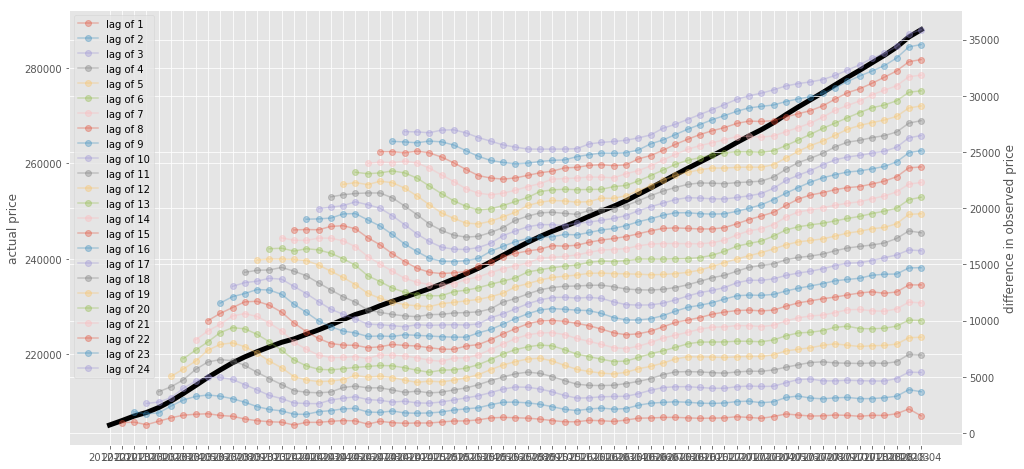

In [90]:
plt.style.use("ggplot")
n_plots = 24
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(df_2012_ts.mean(), color="black", lw=5)
ax1.set_ylabel("actual price")
ax2 = ax1.twinx()
for i in range(n_plots):
    i += 1
    ax2.plot(
        df_2012_ts.mean().diff(i).index,
        df_2012_ts.mean().diff(i),
                "-o",
                alpha=100 / n_plots ** 0.5,
                label="lag of %d" % i,
    )
    ax2.set_ylabel("difference in observed price")
    ax2.legend()
plt.show()

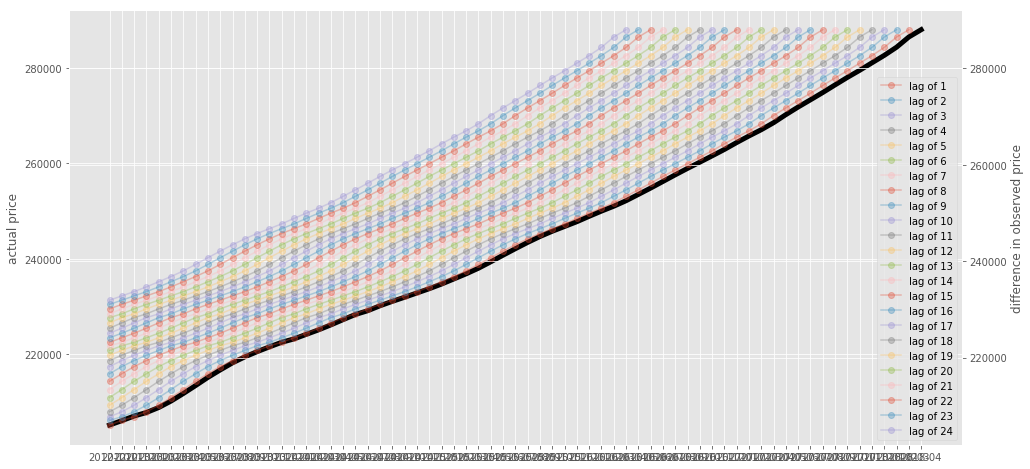

In [91]:
n_plots = 24
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(df_2012_ts.mean(), color="black", lw=5)
ax1.set_ylabel("actual price")
ax2 = ax1.twinx()
for i in range(n_plots):
    i += 1
    ax2.plot(
        df_2012_ts.mean().shift(-i).index,
        df_2012_ts.mean().shift(-i),
                "-o",
                alpha=100 / n_plots ** 0.5,
                label="lag of %d" % i,
    )
    ax2.set_ylabel("difference in observed price")
    ax2.legend()
plt.show()

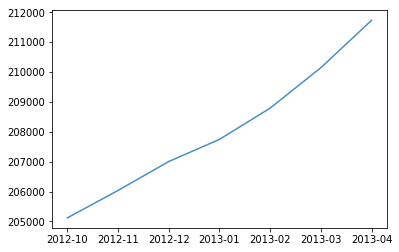

In [20]:
plt.plot(df_2012_ts.mean(), alpha=100/df_ts.shape[0] ** .5)
plt.show()

In [4]:
display(df.shape)
# display(df.head())
df.head()

(14723, 272)

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06   ...     2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0   ...     1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0   ...      308000   310000   312500   
2         3  210400.0  212200.0  212200.0   ...      321000   320600   320200   
3         4  498100.0  500900.0  503100.0   ...     1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0   ...      119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

#### Single zip code

In [5]:
df.loc[df["City"] == "Katy"]

RegionID  RegionName  City State    Metro CountyName  SizeRank  \
2        91982       77494  Katy    TX  Houston     Harris         3   
8        91940       77449  Katy    TX  Houston     Harris         9   
3574     91981       77493  Katy    TX  Houston     Harris      3575   

       1996-04   1996-05   1996-06   ...     2017-07  2017-08  2017-09  \
2     210400.0  212200.0  212200.0   ...      321000   320600   320200   
8      95400.0   95600.0   95800.0   ...      166800   167400   168400   
3574  114500.0  114600.0  115000.0   ...      206000   206100   206100   

      2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
2      320400   320800   321200   321200   323000   326900   329900  
8      169600   170900   172300   173300   174200   175400   176200  
3574   206500   207900   209500   210400   212000   214500   216000  

[3 rows x 272 columns]

In [12]:
# df = df.iloc[:,7:].apply(lambda x: pd.to_datetime(x, format="%Y-M"))

#### Questions I have:
* How do I make this data stationary?
* Check for stationarity?
* Apply some sort of a time series analysis SARIMA
* does the size rank effect the time series relations ship between price?
* how do we measure the degree to which all of the data is most stationary

In [6]:
import numba
from numba import jit, njit, prange

In [7]:
@jit
def dicky_fuller_pvalues(df, size=-1, random=False):
    if size > 0:
        size = min(df.shape[0], size)
    else:
        size = df.shape[0]
    result = np.ones(size)
    r = np.array(np.random.random(size) * df.shape[0] // 1, dtype=np.int32)
    for i in prange(size):
        region_times = None
        if random:
            region_times = df.iloc[r[i]]
        else:
            region_times = df.iloc[i]
        dftest = adfuller(region_times.dropna())
        result[i] = dftest[1]
#         dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#         for key,value in dftest[4].items():
#             dfoutput['Critical Value (%s)'%key] = value
#         print(dfoutput)
            
    return result

In [33]:
adfuller?

In [106]:
df_diffed_logged_09 = df.iloc[:, 160:].diff(axis=1).apply(lambda x: log_non_nans(x, 1), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [89]:
df_diffed_logged_09.head()

2009-01  2009-02   2009-03   2009-04   2009-05   2009-06   2009-07  \
0      NaN      NaN  8.476371  8.732305  8.999619  9.059517  8.732305   
1      NaN      NaN  6.214608  6.214608  6.551080  5.703782       NaN   
2      NaN      NaN  5.703782  4.605170  5.703782  6.396930  5.991465   
3      NaN      NaN  9.093807  9.305651  9.517825  9.553930  9.323669   
4      NaN      NaN  6.214608  5.991465  6.396930  6.396930  5.991465   

    2009-08   2009-09   2009-10    ...      2017-07   2017-08   2017-09  \
0  8.242756  7.696213  6.214608    ...     8.764053  7.600902  5.703782   
1  5.298317  5.298317  4.605170    ...     6.907755  7.600902  7.824046   
2  5.991465  5.703782  4.605170    ...     4.605170  5.991465  5.991465   
3  8.999619  8.612503  7.696213    ...     6.684612  7.649693  5.703782   
4  5.703782  5.298317  5.703782    ...     5.298317  5.703782  6.396930   

    2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
0  7.495542  8.216088  8.594154  8.648221  8.748305  8.039157  8.070906  
1  7.377759  6.802395  7.377759  7.313220  7.313220  7.313220  6.551080  
2  5.298317  5.991465  5.991465       NaN  7.495542  8.268732  8.006368  
3  8.318742  8.536996  7.783224  8.216088  8.216088  7.649693  7.313220  
4  5.703782       NaN       NaN       NaN  5.298317  6.214608  6.214608  

[5 rows x 112 columns]

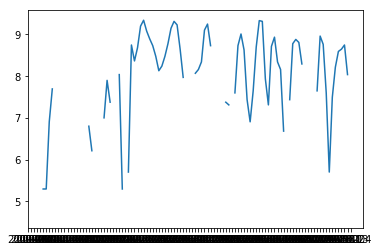

In [102]:
plt.plot(df_diffed_logged_09.iloc[0])

In [32]:
plt.hist(dful_pvals_09)

NameError: name 'dful_pvals_09' is not defined

In [82]:
df_diffed_logged_09

2009-01  2009-02    2009-03    2009-04    2009-05    2009-06  \
0          NaN      NaN        NaN        NaN        NaN        NaN   
1          NaN      NaN        NaN        NaN        NaN        NaN   
2          NaN      NaN        NaN   4.605170   5.703782   6.396930   
3          NaN      NaN        NaN        NaN        NaN        NaN   
4          NaN      NaN        NaN        NaN        NaN        NaN   
5          NaN      NaN        NaN        NaN        NaN        NaN   
6          NaN      NaN        NaN        NaN        NaN        NaN   
7          NaN      NaN        NaN        NaN        NaN        NaN   
8          NaN      NaN        NaN        NaN        NaN        NaN   
9          NaN      NaN   6.214608        NaN        NaN        NaN   
10         NaN      NaN        NaN        NaN        NaN        NaN   
11         NaN      NaN        NaN        NaN        NaN        NaN   
12         NaN      NaN        NaN        NaN        NaN        NaN   
13         NaN      NaN        NaN        NaN        NaN        NaN   
14         NaN      NaN        NaN        NaN        NaN        NaN   
15         NaN      NaN        NaN        NaN        NaN        NaN   
16         NaN      NaN        NaN        NaN        NaN        NaN   
17         NaN      NaN        NaN        NaN        NaN        NaN   
18         NaN      NaN        NaN        NaN        NaN        NaN   
19         NaN      NaN        NaN        NaN        NaN        NaN   
20         NaN      NaN  11.657891  11.772979  11.624467  10.941996   
21         NaN      NaN  11.034890  11.516917  10.789319   9.047821   
22         NaN      NaN        NaN        NaN        NaN        NaN   
23         NaN      NaN        NaN        NaN        NaN        NaN   
24         NaN      NaN        NaN        NaN        NaN        NaN   
25         NaN      NaN   4.605170        NaN        NaN        NaN   
26         NaN      NaN        NaN        NaN        NaN        NaN   
27         NaN      NaN        NaN        NaN        NaN        NaN   
28         NaN      NaN        NaN        NaN        NaN        NaN   
29         NaN      NaN        NaN        NaN        NaN        NaN   
30         NaN      NaN        NaN        NaN        NaN        NaN   
31         NaN      NaN        NaN        NaN        NaN        NaN   
32         NaN      NaN        NaN        NaN        NaN        NaN   
33         NaN      NaN        NaN        NaN        NaN        NaN   
34         NaN      NaN        NaN        NaN        NaN        NaN   
35         NaN      NaN        NaN        NaN        NaN        NaN   
36         NaN      NaN        NaN        NaN        NaN        NaN   
37         NaN      NaN   5.298317   4.605170        NaN        NaN   
38         NaN      NaN        NaN        NaN        NaN        NaN   
39         NaN      NaN        NaN        NaN        NaN        NaN   
40         NaN      NaN        NaN        NaN        NaN        NaN   
41         NaN      NaN   4.605170   4.605170        NaN        NaN   
42         NaN      NaN        NaN        NaN        NaN        NaN   
43         NaN      NaN   7.696213   7.600902   7.495542   7.377759   
44         NaN      NaN        NaN        NaN        NaN        NaN   
45         NaN      NaN        NaN        NaN        NaN        NaN   
46         NaN      NaN        NaN   4.605170        NaN        NaN   
47         NaN      NaN        NaN        NaN        NaN        NaN   
48         NaN      NaN        NaN        NaN        NaN        NaN   
49         NaN      NaN        NaN        NaN        NaN        NaN   
50         NaN      NaN        NaN        NaN        NaN        NaN   
51         NaN      NaN        NaN        NaN        NaN        NaN   
52         NaN      NaN        NaN        NaN        NaN        NaN   
53         NaN      NaN        NaN        NaN        NaN        NaN   
54         NaN      NaN   6.396930   5.991465   6.396930   6.396930   
55         NaN      NaN        

In [61]:
df_09_diff_log = pd.concat([df.iloc[:,:7], df_diffed_logged_09], sort=False)

In [67]:
time_09_diff_log = df_09_diff_log.iloc[:,7:]

In [73]:
time_09_diff_log.head()

2009-01  2009-02  2009-03  2009-04  2009-05  2009-06  2009-07  2009-08  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2009-09  2009-10   ...     2017-07  2017-08  2017-09  2017-10  2017-11  \
0      NaN      NaN   ...         NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN   ...         NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN   ...         NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN   ...         NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN   ...         NaN      NaN      NaN      NaN      NaN   

   2017-12  2018-01  2018-02  2018-03  2018-04  
0      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN  

[5 rows x 112 columns]

In [71]:
lag_acf = acf(time_09_diff_log.iloc[0], nlags=25)

In [72]:
lag_acf

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [9]:
!ls logdifflag/loglags/

09_loglagof001.csv  09_loglagof007.csv	09_loglagof013.csv  09_loglagof019.csv
09_loglagof002.csv  09_loglagof008.csv	09_loglagof014.csv  09_loglagof020.csv
09_loglagof003.csv  09_loglagof009.csv	09_loglagof015.csv  09_loglagof021.csv
09_loglagof004.csv  09_loglagof010.csv	09_loglagof016.csv  09_loglagof022.csv
09_loglagof005.csv  09_loglagof011.csv	09_loglagof017.csv  09_loglagof023.csv
09_loglagof006.csv  09_loglagof012.csv	09_loglagof018.csv  09_loglagof024.csv


In [24]:
ll1df = pd.read_csv("logdifflag/loglags/09_loglagof001.csv")

In [28]:
ll1df_ts = ll1df.iloc[:, 7:]

In [22]:
mydf.summary

AttributeError: 'DataFrame' object has no attribute 'summary'